In [1]:
import N_body
from N_body import dot, group, generator

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from functools import partial
%matplotlib notebook

In [2]:
dots = [dot(mass = 1000, position = [0, 0, 0], velocity = [0.1, 0, 0]), 
        dot(mass = 1, position = [0, 1, 100], velocity = [0, 1.0001, 0]), 
        dot(mass = 1, position = [0, -1, 100], velocity = [0, -0.9999, 0]),
        #dot(mass = 1, position = [-100, -100, -100], velocity = [0, 0, 0]),
        #dot(mass = 1, position = [100, 100, 100], velocity = [0, 0, 0])
       ]

gauss_gen = generator(
    m_loc=0,
    m_scale=100,
    p_loc=0,
    p_scale=100,
    v_loc=0,
    v_scale=0.1)

g = group(N=10, generator=gauss_gen)
g.update(100,1001)
g.COM_history

[(array([ -7.86898884, -33.5946507 ,  36.70320863]),
  array([0.04394526, 0.04388171, 0.00365587])),
 (array([ -7.82504359, -33.55076899,  36.7068645 ]),
  array([0.04394526, 0.04388171, 0.00365587])),
 (array([ -7.78109833, -33.50688727,  36.71052038]),
  array([0.04394526, 0.04388171, 0.00365587])),
 (array([ -7.73715307, -33.46300556,  36.71417625]),
  array([0.04394526, 0.04388171, 0.00365587])),
 (array([ -7.69320782, -33.41912385,  36.71783212]),
  array([0.04394526, 0.04388171, 0.00365587])),
 (array([ -7.64926256, -33.37524213,  36.721488  ]),
  array([0.04394526, 0.04388171, 0.00365587])),
 (array([ -7.60531731, -33.33136042,  36.72514387]),
  array([0.04394526, 0.04388171, 0.00365587])),
 (array([ -7.56137205, -33.28747871,  36.72879974]),
  array([0.04394526, 0.04388171, 0.00365587])),
 (array([ -7.51742679, -33.24359699,  36.73245562]),
  array([0.04394526, 0.04388171, 0.00365587])),
 (array([ -7.47348154, -33.19971528,  36.73611149]),
  array([0.04394526, 0.04388171, 0.003

<IPython.core.display.Javascript object>


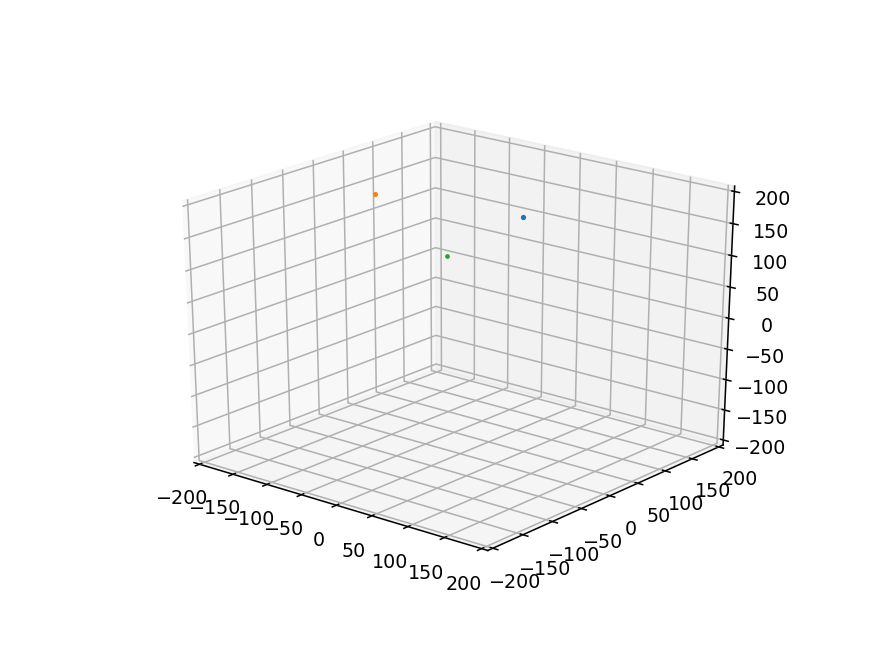

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d', adjustable='box')
#g.visualize_dots(5)
ani_func = partial(g.visualize_dots, ax=ax)
ani = FuncAnimation(fig, ani_func, frames=1000, interval=10, repeat=True)
#set_axes_equal(ax)
#g.visualize_dots(4, ax)
plt.show(block=False)

In [13]:
ms = []
rs = []

dots = gauss_gen.generate(100000)
for d in sorted(dots, key = lambda x: x.mass):
    ms.append(d.mass)
    rs.append(d.radius)

<IPython.core.display.Javascript object>


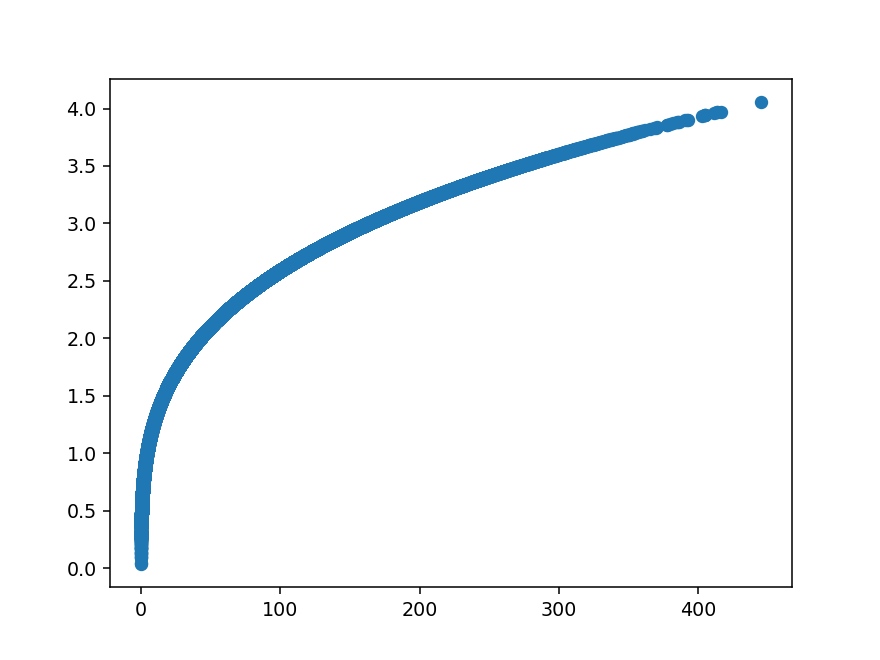

In [14]:
fig, ax = plt.subplots()
ax.scatter(x=ms, y=rs)

<IPython.core.display.Javascript object>


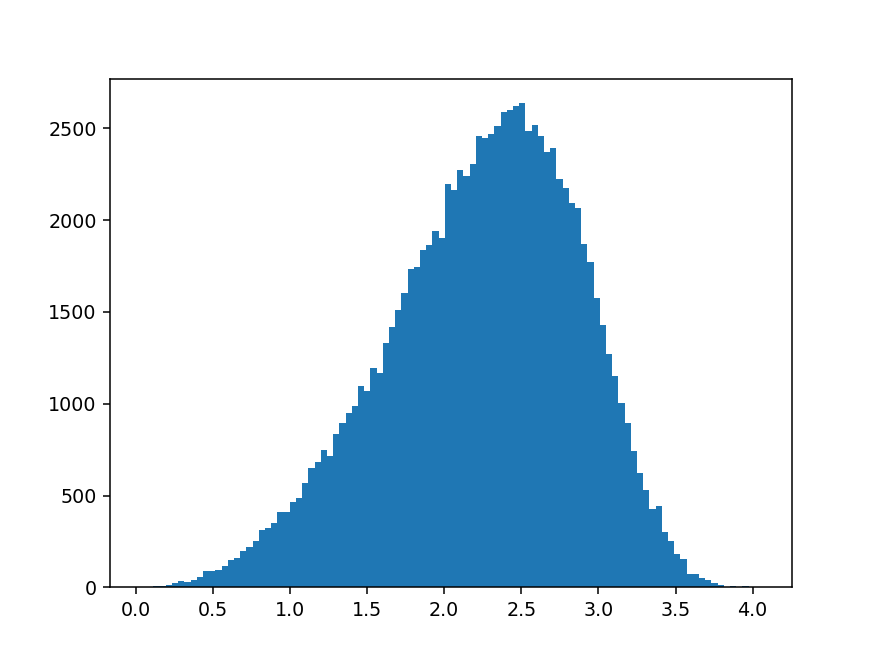

In [17]:
fig, ax = plt.subplots()
ax.hist(rs, bins=100)
plt.show()